In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
athlete = pd.read_csv('active_player.csv').dropna()
athlete.head()

,#,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,1,Stephen Curry,GSW,63,34.2,10.4,21.7,0.482,5.3,12.7,...,0.916,3.4,1.9,0.5,5.0,5.5,5.8,1.2,0.1,32.0
1,2,Bradley Beal,WAS,60,35.8,11.2,23.0,0.485,2.2,6.2,...,0.889,3.1,2.3,1.2,3.5,4.7,4.4,1.1,0.4,31.3
2,3,Damian Lillard,POR,67,35.8,9.0,19.9,0.451,4.1,10.5,...,0.928,3.0,1.5,0.5,3.7,4.2,7.5,0.9,0.3,28.8
3,4,Joel Embiid,PHI,51,31.1,9.0,17.6,0.513,1.1,3.0,...,0.859,3.1,2.4,2.2,8.4,10.6,2.8,1.0,1.4,28.5
4,5,Giannis Antetokounmpo,MIL,61,33.0,10.3,18.0,0.569,1.1,3.6,...,0.685,3.4,2.8,1.6,9.4,11.0,5.9,1.2,1.2,28.1


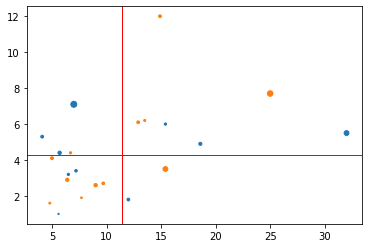

In [3]:
gsw_player = athlete[athlete['Team']=='GSW']
gsw_player_ppg = gsw_player['PPG']
gsw_player_rpg = gsw_player['RPG']

lal_player = athlete[athlete['Team']=='LAL']
lal_player_ppg = lal_player['PPG']
lal_player_rpg = lal_player['RPG']

plt.scatter(gsw_player_ppg,gsw_player_rpg,s = gsw_player['APG']*4) #s 是size
plt.scatter(lal_player_ppg,lal_player_rpg,s = lal_player['APG']*4) #s 是size

plt.axvline(gsw_player_ppg.mean(),linewidth = 1,c = 'r')#竖线
plt.axhline(gsw_player_rpg.mean(),linewidth = 1,c = 'r')#横线

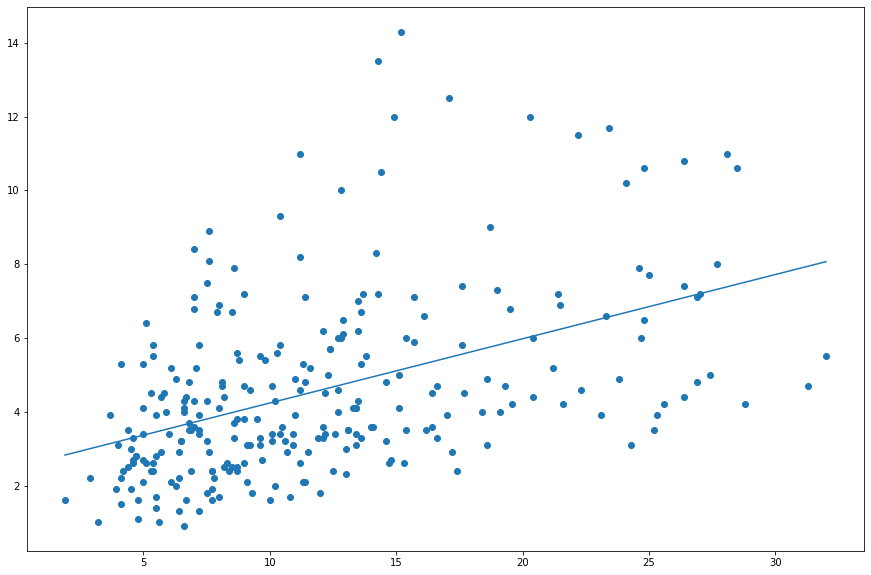

In [7]:
player_ppg = athlete['PPG']
player_rpg = athlete['RPG']

plt.figure(figsize=(15,10))
plt.scatter(player_ppg,player_rpg)

#回归曲线
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(player_ppg.values.reshape(player_ppg.shape[0],1),player_rpg) #fit的第一个变量需要一个二维数组 这里我们把它变为n行一列
predict = model.predict(player_ppg.values.reshape(player_ppg.shape[0],1))

plt.plot(player_ppg,predict)

In [8]:
athlete

,#,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,1,Stephen Curry,GSW,63,34.2,10.4,21.7,0.482,5.3,12.7,...,0.916,3.4,1.9,0.5,5.0,5.5,5.8,1.2,0.1,32.0
1,2,Bradley Beal,WAS,60,35.8,11.2,23.0,0.485,2.2,6.2,...,0.889,3.1,2.3,1.2,3.5,4.7,4.4,1.1,0.4,31.3
2,3,Damian Lillard,POR,67,35.8,9.0,19.9,0.451,4.1,10.5,...,0.928,3.0,1.5,0.5,3.7,4.2,7.5,0.9,0.3,28.8
3,4,Joel Embiid,PHI,51,31.1,9.0,17.6,0.513,1.1,3.0,...,0.859,3.1,2.4,2.2,8.4,10.6,2.8,1.0,1.4,28.5
4,5,Giannis Antetokounmpo,MIL,61,33.0,10.3,18.0,0.569,1.1,3.6,...,0.685,3.4,2.8,1.6,9.4,11.0,5.9,1.2,1.2,28.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,260,Matisse Thybulle,PHI,65,20.0,1.6,3.7,0.420,0.7,2.2,...,0.444,0.5,2.0,0.5,1.4,1.9,1.0,1.6,1.1,3.9
260,261,P.J. Tucker,MIL,52,26.1,1.3,3.4,0.373,0.8,2.3,...,0.750,0.8,2.4,1.0,2.9,3.9,1.2,0.8,0.4,3.7
261,262,Amir Coffey,LAC,44,9.0,1.0,2.3,0.437,0.5,1.3,...,0.711,0.3,0.7,0.2,0.8,1.0,0.5,0.2,0.0,3.2
262,263,Thanasis Antetokounmpo,MIL,57,9.7,1.2,2.4,0.489,0.1,0.5,...,0.510,0.8,1.3,0.9,1.2,2.2,0.8,0.4,0.2,2.9
